# Finding Donors for *CharityML*
### by Javier Alonso

This notebook faces the project about finding donors in [Kaggle](https://www.kaggle.com/c/udacity-mlcharity-competition). We are a charity organization who tries to find donnors. From the past we´ve seen that most of our donnors make mor than $50,000, so our mission is trying to know from the data from the census who make more than $50,000, so we can make a communication campaign on them

## Getting Started

This project has an already prepared database where we don´t need to do the ETL (just loading the data), and we´ll try different supervised algorithms trying to model the individuals income, using data from the census.

While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

The results have been posted in [my blog](https://medium.com/@canceleiro/titanic-machine-learning-from-disaster-2a95fca25390)

## Table of Contents

1. [Gathering Data](#Gathering_data)<br>
2. [Exploratory Data Analysis](#EDA)<br>
3. [Machine Learning Algorithm](#MLA)<br>
3.a.-[Preparing the Data](#Preparing_Data)<br>
3.b.-[Transforming Skewed Continuous Features](#Skewed_features)<br>
3.c.-[Normalizing Numerical Features](#Normalization)<br>
3.d.-[Dummies for cathegorical values](#Dummies)<br>
3.e.-[Splitting data](#Split_Data)<br>
4. [Further steps](#More_steps)<br>


## <a class="anchor" id="Gathering_data">Part 1: Gathering Data
    
- Import Python libraries
- Load dataset from database 

In [162]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

# Import functionality for cloning a model
from sklearn.base import clone

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [163]:
# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [164]:
data.sample(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
24700,21,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Other-relative,White,Male,0.0,0.0,20.0,Mexico,<=50K
18267,66,Self-emp-inc,7th-8th,4.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
25729,24,Private,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K
30915,21,State-gov,Some-college,10.0,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,16.0,United-States,<=50K
41073,47,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


## <a class="anchor" id="EDA">Part 2: Exploratory Data Analysis (EDA)
    
Let´s extract some valuable information out of the data set

In [3]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data.income=='>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data.income=='<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = len(data[data.income=='>50K'])/len(data)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 0.2478439697492371%


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


I´ve done the EDA visually in Tableau. The resume, as you can see next, would be:

- It seems the relevant features for determining the income are: education, capital gain, capital loss, age, hours per week and sex
- There are other features that are clearly undistributed that can´t be so relevant, as there is no enough population in some of the classes

- I haven´t analysed marital status and relationship as I don´t think it has much importance in this

![Relevant_features](Relevant_features_2.png)

![Other_features](Other_features_3.png)

## <a class="anchor" id="MLA">Part 3: Machine learning algorithm

### <a class="anchor" id="Preparing_Data"> 3.a.- Preparing the Data


In [34]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

#### Binning the age
I´m going to classify the age in bins of 10 years

In [35]:
features_raw.age.describe()

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [36]:
bins = [9,19,29, 39, 49, 59, 69, 79,89,99]
group_names = ['10-19','20-29','30-39', '40-49', '50-59', '60-69', '70-79','80-89','90-99']
age_categories = pd.cut(features_raw['age'], bins, labels=group_names)
features_raw['age_categories'] = pd.cut(features_raw['age'], bins, labels=group_names)
age_categories
features_raw.drop(columns=['age'], inplace = True)
pd.value_counts(features_raw['age_categories'])

30-39    12362
20-29    10993
40-49    10305
50-59     6264
60-69     2514
10-19     2052
70-79      589
80-89       97
90-99       46
Name: age_categories, dtype: int64

In [37]:
features_raw.head()

,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,age_categories
0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,30-39
1,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,50-59
2,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,30-39
3,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,50-59
4,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,20-29


#### Droping duplicate columns
Education level and education num have the same info. I delete the education level

In [38]:
features_raw.drop(columns=['education_level'], inplace = True)

In [39]:
features_raw.head()

,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,age_categories
0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,30-39
1,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,50-59
2,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,30-39
3,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,50-59
4,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,20-29


#### Transforming Skewed Continuous Features
Numerical features that are skewed should be logarithmic transformed for reducing the skewness. We get the values of skewness

In [41]:
features_raw.skew(axis = 0, skipna = True)

education-num     -0.310621
capital-gain      11.789002
capital-loss       4.516304
hours-per-week     0.340545
dtype: float64

We can see the features skewed are the capital gain and the capital loss

Text(0.5, 1.0, 'Capital Loss')

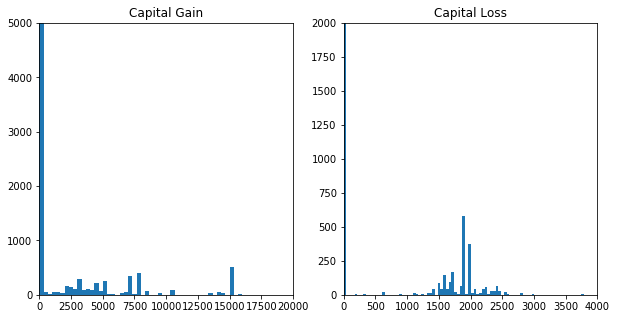

In [42]:
plt.figure(figsize = [10, 5])


plt.subplot(1, 2, 1)
# bin_edges = np.arange(0, data["capital-gain"].max()+5, 5)
plt.hist(features_raw["capital-gain"], bins = 300);
plt.xlim(0,20000)
plt.ylim(0,5000)
plt.title("Capital Gain")

plt.subplot(1, 2, 2)
# bin_edges = np.arange(0, data["capital-gain"].max()+5, 5)
plt.hist(features_raw["capital-loss"], bins = 100);
plt.xlim(0,4000)
plt.ylim(0,2000)
plt.title("Capital Loss")

We apply the logarithmic transformation to these two features, so the skewed distribution doesn´t affect the ML algorithm.

There´s one important issue, the logarithm of 0 is undefined, so we do the transformation summing 1 to avoid zero values

In [43]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log = pd.DataFrame(data = features_raw)
features_log[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

Text(0.5, 1.0, 'Capital Loss')

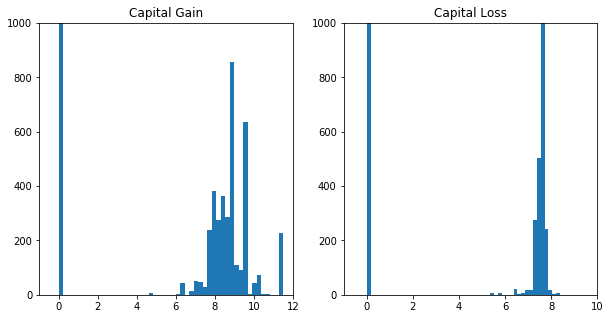

In [44]:
plt.figure(figsize = [10, 5])

plt.subplot(1, 2, 1)
# bin_edges = np.arange(0, data["capital-gain"].max()+5, 5)
plt.hist(features_log["capital-gain"], bins = 50);
plt.xlim(-1,12)
plt.ylim(0,1000)
plt.title("Capital Gain")

plt.subplot(1, 2, 2)
# bin_edges = np.arange(0, data["capital-gain"].max()+5, 5)
plt.hist(features_log["capital-loss"], bins = 50);
plt.xlim(-1,10)
plt.ylim(0,1000)
plt.title("Capital Loss")

#### Normalizing Numerical Features
All numerical features must be normalized

In [47]:
features_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   workclass       45222 non-null  object  
 1   education-num   45222 non-null  float64 
 2   marital-status  45222 non-null  object  
 3   occupation      45222 non-null  object  
 4   relationship    45222 non-null  object  
 5   race            45222 non-null  object  
 6   sex             45222 non-null  object  
 7   capital-gain    45222 non-null  float64 
 8   capital-loss    45222 non-null  float64 
 9   hours-per-week  45222 non-null  float64 
 10  native-country  45222 non-null  object  
 11  age_categories  45222 non-null  category
dtypes: category(1), float64(4), object(7)
memory usage: 3.8+ MB


In [48]:
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_norm = pd.DataFrame(data = features_log)
features_log_norm[numerical] = scaler.fit_transform(features_log[numerical])

# Show an example of a record with scaling applied
features_log_norm.head()

,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,age_categories
0,State-gov,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States,30-39
1,Self-emp-not-inc,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,50-59
2,Private,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,30-39
3,Private,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,50-59
4,Private,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,20-29


#### Dummies for cathegorical values

We get the dummies for the cathegorical features, both in features and income

In [50]:
features_log_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   workclass       45222 non-null  object  
 1   education-num   45222 non-null  float64 
 2   marital-status  45222 non-null  object  
 3   occupation      45222 non-null  object  
 4   relationship    45222 non-null  object  
 5   race            45222 non-null  object  
 6   sex             45222 non-null  object  
 7   capital-gain    45222 non-null  float64 
 8   capital-loss    45222 non-null  float64 
 9   hours-per-week  45222 non-null  float64 
 10  native-country  45222 non-null  object  
 11  age_categories  45222 non-null  category
dtypes: category(1), float64(4), object(7)
memory usage: 3.8+ MB


In [51]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_norm,drop_first = True)

# TODO: Encode the 'income_raw' data to numerical values
income = pd.get_dummies(income_raw,drop_first = True)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

87 total features after one-hot encoding.
['education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-relative', 'relationship_ Own-child', 'relationship_ Unmarried', 'relationship_ Wife', 'race_

In [88]:
features_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
income.head()

,>50K
0,0
1,0
2,0
3,0
4,0


#### Splitting data
We split the data

In [76]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has",X_train.shape[0], "samples.")
print("Testing set has",X_test.shape[0],"samples.")

Training set has 36177 samples.
Testing set has 9045 samples.


### <a class="anchor" id="Evaluate_Model"> 3.b.- Evaluating Model Performance

In this section, we will investigate different algorithms, and determine which is best at modeling the data. One will be the *naive predictor* and the other some of our choiche

#### Naive Predictor Performace

The Naive Predictor is the one that predicts all people made more than $50,000. The score would be of a silly predictor with no intelligence. We calculate it as a reference for our scores


In [54]:
# Counting the ones as this is the naive case. 
# Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
TP = np.sum(income)[0]
# Specific to the naive case
FP = income.count()[0] - TP
# No predicted negatives in the naive case
TN = 0 
# No predicted negatives in the naive case
FN = 0 

# TODO: Calculate accuracy, precision and recall
accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+0.5*0.5)*precision*recall /((0.5*0.5*precision)+recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


#### Implementation - Creating a Training and Predicting Pipeline
For evaluating the performance of different models and create a training and predicting pipeline


In [112]:
# def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using
    #.fit(training_features[:], training_labels[:])
    start = time() # Get start time
    clf = learner
    clf.fit(X_train, y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = (end - start)/60
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_train = clf.predict(X_train)
    predictions_test = clf.predict(X_test)
    end = time() # Get end time    
    # TODO: Calculate the total prediction time
    results['pred_time'] = (end - start)/60
                
    # TODO: Compute F-score 
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
        
    # Return the results
    return results

#### Implementation: Selecting the best performance model
I´ll check which model with default parameters works better

In [126]:
Classifiers = [LinearSVC(random_state=0),
               KNeighborsClassifier(), 
               SVC(random_state=0),
               AdaBoostClassifier(random_state=0),
               RandomForestClassifier(random_state=0),
               GradientBoostingClassifier(random_state=0)]

# Classifiers = [LinearSVC(random_state=0)]
model_comparison_df = pd.DataFrame(columns=['model_name', 'train_time', 'train_fscore', 'test_time', 'test_fscore'])       


# Collect results on the learners
results = {}
i = 0
for clf in Classifiers:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name][i] = \
    train_predict(clf, X_train, y_train, X_test, y_test)
    model = list(results.keys())[i]
    train_time = results[model][i]['train_time']
    train_fscore = results[model][i]['f_train']
    test_time = results[model][i]['pred_time']
    test_fscore = results[model][i]['f_test']
    model_comparison_df.loc[i] = [model, train_time, train_fscore, test_time, test_fscore]
    i = i +1
model_comparison_df = model_comparison_df.sort_values(by='test_fscore', ascending=False)

C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_

In [127]:
 model_comparison_df

,model_name,train_time,train_fscore,test_time,test_fscore
5,GradientBoostingClassifier,0.084172,0.750868,0.001562,0.734454
3,AdaBoostClassifier,0.031668,0.724964,0.011501,0.718076
2,SVC,1.121144,0.711210,0.860364,0.699069
4,RandomForestClassifier,0.060428,0.893626,0.013929,0.693544
0,LinearSVC,0.007596,0.700173,0.000332,0.691883
1,KNeighborsClassifier,0.030613,0.740850,1.461460,0.626950


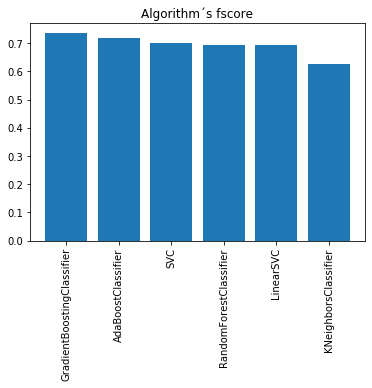

In [129]:
plt.bar(model_comparison_df.model_name,model_comparison_df.test_fscore);
plt.xticks(rotation='vertical');
plt.title("Algorithm´s fscore");

#### Improving Results(I)
The best results in the prior tests say that GradientBoostingClassifier is been the best clasiffier. It had the best fscore and time is not a problem, so that will be the model I´m going to try to improve

Gradient Boosting Classifier is an ensemble algorithm, so the final result is a mix of other algorithms taking the best out of them. In our case it gets the best decision trees for the different prediction areas that we have.

A decision tree works like human mind does most of the times. It bases the decision on doing questions with answers of type Yes/no, narrowing the tree until it gets the final answer.

One big problem is that it always overfits the data, meaning that "memorizes" the answers, so in training mode works well but in testing don´t, and is not able to generalise in a proper way.

And here it comes an ensemble method of Gradient Boosting Classifier. It builds different decision trees, with different parameters and diferent features selection on the branches, to get a better result that doesn´t overfit. The best of boosting is that gets the best qualities of all the decision trees created and applies them in the areas where they are top, resulting in an algorithm that works really well.

For improving the results I´m going to tune the model using grid search with a few parameters.

In [132]:
# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [50,100,500,1000],
              'learning_rate': [0.1,0.5,1,1.5],
              'loss':['eviance', 'exponential']
             }


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)



C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 'eviance' not supported. 

  FitFailedWarning)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be 

C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 'eviance' not supported. 

  FitFailedWarning)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 'eviance' not supported. 

  FitFailedWarning)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 'eviance' not supported. 

  FitFailedWarning)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 'eviance' not supported. 

  FitFailedWarning)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 'eviance' not supported. 

  FitFailedWarning)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be 

C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [133]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final F-score on the testing data: {:.4f}\n".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("The final parameters are:",best_clf)

Unoptimized model
------
Accuracy score on testing data: 0.8604
F-score on testing data: 0.7345

Optimized Model
------
Final accuracy score on the testing data: 0.8726
Final F-score on the testing data: 0.7563

The final parameters are: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### Improving Results(II)
I try to tune some other parameters to get a better performance

In [139]:
# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=0, n_estimators =1000,learning_rate = 0.1,loss ='exponential')

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'max_depth': [2,3,5],
              'min_samples_split': [1,2,5],
              'min_samples_leaf':[0.5,1,1.5]
             }


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)



C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The

C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 1.5

  FitFailedWarning)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConve

C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 1.5

  FitFailedWarning)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition 

C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\cance\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 1.5

  FitFailedWarning)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final F-score on the testing data: {:.4f}\n".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("The final parameters are:",best_clf)

Unoptimized model
------
F-score on testing data: 0.7563

Optimized Model
------
Final F-score on the testing data: 0.7563

The final parameters are: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)



|     Metric     | Naive predictor  | Unoptimized Model | Optimized Model |
| :------------: | :---------------:| :---------------: | :-------------: | 
| F-score        |       0.2917     |      0.7345       |     0.7563      |


In this ocassion we haven´t been able to improve the model, so this is our final model


#### Feature importance
Let´s check which are the features with best performance when we use this model

In [159]:
importances = best_clf.feature_importances_

indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices]
values = importances[indices]
features_comparison_df = pd.DataFrame(columns=['feature', 'feature_weight'])

In [160]:
features_comparison_df['feature'] = columns
features_comparison_df['feature_weight'] = values

In [161]:
features_comparison_df.head(10)

,feature,feature_weight
0,marital-status_ Married-civ-spouse,0.326523
1,capital-gain,0.203771
2,education-num,0.190562
3,capital-loss,0.069679
4,hours-per-week,0.045045
5,age_categories_20-29,0.028877
6,occupation_ Exec-managerial,0.016878
7,occupation_ Prof-specialty,0.010382
8,age_categories_50-59,0.006940
9,occupation_ Other-service,0.006067


## <a class="anchor" id="More_steps">Part 4: Further steps
   
Although we improved the performance there are always more possibilites. Some of them are:
- try other algorithms. Gradient Boosting Classifier was the best with default parameters but other algorithm could increase the performance with the parameters tuning
- try other features. keep on trying tuning other different parameters